
# Sales

In [1]:
# 'dia-mes-ano'
start_date = '01-05-17'
end_date = '21-05-17'

### Top Citys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

customers = pd.read_csv('../dataset/olist_customers_dataset.csv', delimiter = ',')
orders = pd.read_csv('../dataset/olist_orders_dataset.csv', delimiter = ',')
order_item = pd.read_csv('../dataset/olist_order_items_dataset.csv', delimiter = ',')
sellers = pd.read_csv('../dataset/olist_sellers_dataset.csv', delimiter = ',')

customers = customers[['customer_id', 'customer_city']]
orders = orders[['order_id', 'customer_id', 'order_purchase_timestamp']]
order_item = order_item[['order_id', 'seller_id', 'price', 'freight_value']]
sellers = sellers[['seller_id', 'seller_city']]

custumer_orders = pd.merge(customers, orders, on='customer_id')
custumer_orders_item = pd.merge(custumer_orders, order_item, on='order_id')
custumer_orders_item_seller = pd.merge(custumer_orders_item, sellers, on='seller_id')

tabela = custumer_orders_item_seller[['customer_id', 'customer_city', 'order_purchase_timestamp','seller_city']]
soma = custumer_orders_item_seller['price'] + custumer_orders_item_seller['freight_value']
tabela_final = pd.concat([tabela, soma], axis=1)

tabela_final['order_purchase_timestamp'] = pd.to_datetime(tabela_final['order_purchase_timestamp'])
tabela_final.columns = ['customer_id','customer_city', 'order_purchase_timestamp', 'seller_city', 'valor']

start_date =  datetime.datetime.strptime(start_date, '%d-%m-%y').date()
end_date =  datetime.datetime.strptime(end_date, '%d-%m-%y').date()

x = tabela_final.loc[(tabela_final['order_purchase_timestamp'].dt.date >= start_date)
                    & (tabela_final['order_purchase_timestamp'].dt.date <= end_date)]

x = x.groupby(['customer_city'], as_index=False).sum()
dado = x.sort_values(by='valor', ascending=False)

dado.head(10)

,customer_city,valor
664,sao paulo,45287.37
585,rio de janeiro,31585.93
198,curitiba,8873.89
601,salvador,6968.31
551,porto alegre,6959.26
79,belo horizonte,6768.44
97,brasilia,5415.54
248,gaspar,4510.08
266,guarulhos,3983.48
232,florianopolis,3660.79


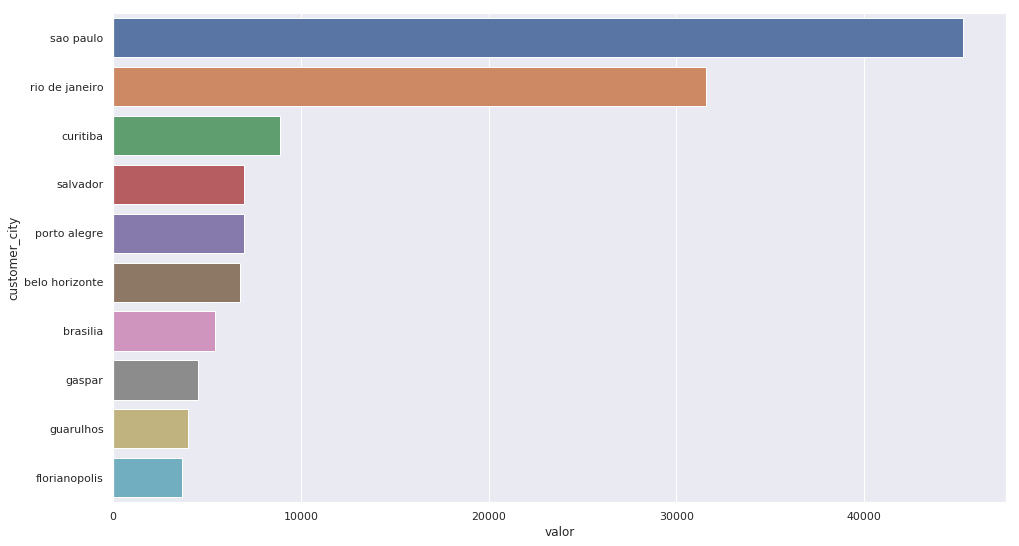

In [3]:
sns.set(rc={'figure.figsize':(16,9)})
ax = sns.barplot(x="valor", y="customer_city", data=dado.head(10))

### Top Sellers

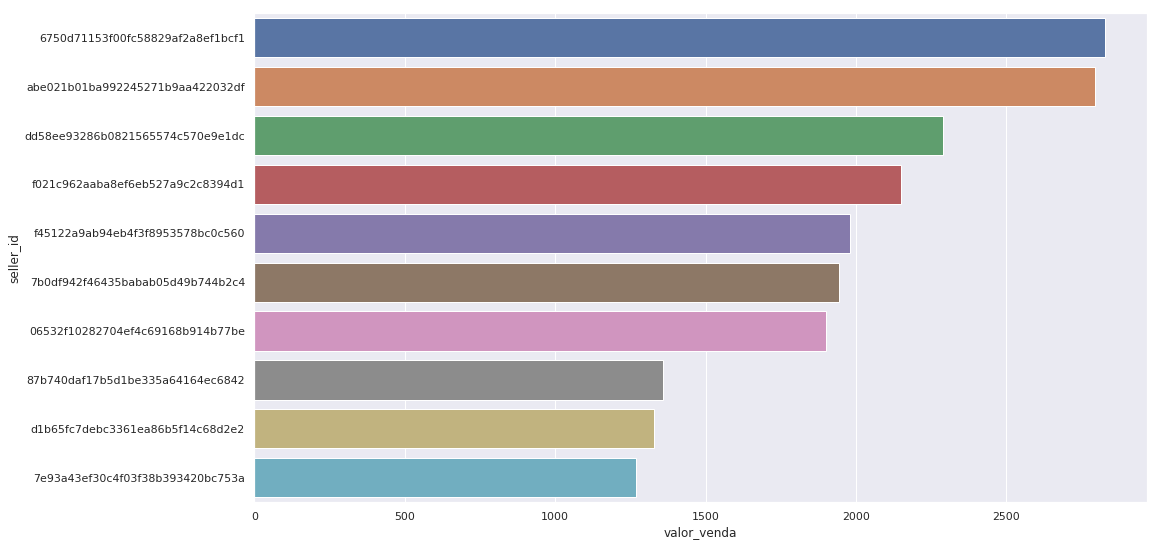

In [4]:
orders = pd.read_csv('../dataset/olist_orders_dataset.csv', delimiter = ',')
order_item = pd.read_csv('../dataset/olist_order_items_dataset.csv', delimiter = ',')
sellers = pd.read_csv('../dataset/olist_sellers_dataset.csv', delimiter = ',')

orders = orders[['order_id', 'order_status', 'order_purchase_timestamp']]
order_item = order_item[['order_id', 'seller_id', 'price', 'freight_value']]
sellers = sellers[['seller_id']]

orders_items = pd.merge(orders, order_item, on='order_id')
orders_items_sellers = pd.merge(orders_items, sellers, on='seller_id')

tabela = orders_items_sellers[['seller_id', 'order_status', 'order_purchase_timestamp']]
soma = orders_items_sellers['price'] + orders_items_sellers['freight_value']
tabela_final = pd.concat([tabela, soma], axis=1)

tabela_final['order_purchase_timestamp'] = pd.to_datetime(tabela_final['order_purchase_timestamp'])

tabela_final.columns = ['seller_id','order_status', 'order_purchase_timestamp', 'valor_venda']

x = tabela_final.loc[(tabela_final['order_purchase_timestamp'].dt.date >= start_date)
                    & (tabela_final['order_purchase_timestamp'].dt.date <= end_date)
                    & (tabela_final['order_status'] == 'delivered')]

dado = x.sort_values(by='valor_venda', ascending=False)

ax = sns.barplot(x="valor_venda", y="seller_id", data=dado.head(10))

In [5]:
dado = dado[['seller_id', 'valor_venda']]
dado.head(10)

,seller_id,valor_venda
103216,6750d71153f00fc58829af2a8ef1bcf1,2827.00
111759,abe021b01ba992245271b9aa422032df,2794.50
108572,dd58ee93286b0821565574c570e9e1dc,2288.31
105471,f021c962aaba8ef6eb527a9c2c8394d1,2150.81
75813,f45122a9ab94eb4f3f8953578bc0c560,1980.71
61726,7b0df942f46435babab05d49b744b2c4,1944.86
104581,06532f10282704ef4c69168b914b77be,1901.62
109477,87b740daf17b5d1be335a64164ec6842,1358.75
80757,d1b65fc7debc3361ea86b5f14c68d2e2,1328.08
28464,7e93a43ef30c4f03f38b393420bc753a,1266.94


### Top 10 Products

In [6]:
orders = pd.read_csv('../dataset/olist_orders_dataset.csv', delimiter = ',')
order_item = pd.read_csv('../dataset/olist_order_items_dataset.csv', delimiter = ',')
products = pd.read_csv('../dataset/olist_products_dataset.csv', delimiter = ',')

orders = orders[['order_id','order_purchase_timestamp', 'order_status']]
order_item = order_item[['order_id','product_id']]
products = products[['product_id','product_category_name']]

orders_n_items = pd.merge(orders, order_item, on='order_id')
final = orders_items = pd.merge(orders_n_items, products, on='product_id')
final = final[['order_purchase_timestamp','product_category_name', 'order_status']]

final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])

x = final.loc[(final['order_purchase_timestamp'].dt.date >= start_date)
                    & (final['order_purchase_timestamp'].dt.date <= end_date)
                    & (final['order_status'] == 'delivered')]

x = x.groupby(["product_category_name"]).size().reset_index(name="amount")
x = x.sort_values('amount', ascending=False)
x.head(10)

/home/victor/anaconda3/envs/olist-Ecommerce/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,product_category_name,amount
10,cama_mesa_banho,224
24,esporte_lazer,219
34,informatica_acessorios,218
54,utilidades_domesticas,202
42,moveis_decoracao,193
8,beleza_saude,191
18,cool_stuff,167
52,telefonia,146
9,brinquedos,127
32,ferramentas_jardim,102


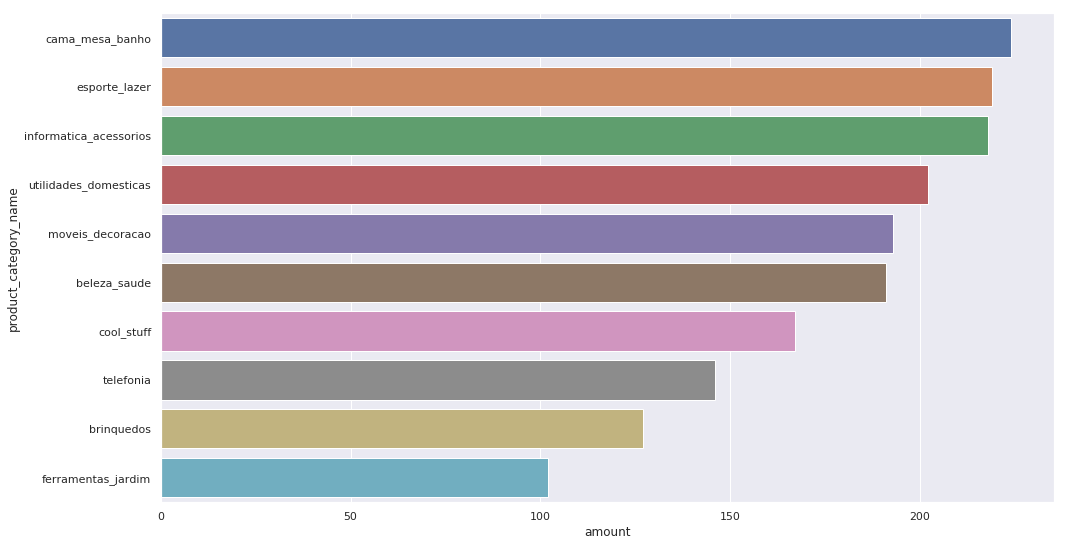

In [7]:
ax = sns.barplot(x="amount", y="product_category_name", data=x.head(10))